Import Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install libgeos-3.5.0
!sudo apt-get install libgeos-dev
!sudo pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
!pip install netCDF4

In [ ]:
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset, date2index
d
from datetime import datetime as dt
from scipy import stats
import pandas as pd
import numpy as np
from pylab import *

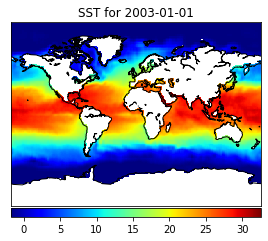

In [ ]:
dataset = Dataset('	http://apdrc.soest.hawaii.edu:80/dods/public_data/NOAA_SST/OISST/weekly_1981-1989')
timevar = dataset.variables['time']
timeindex = 37
# read u current
uc = dataset.variables['sst'][timeindex,:].squeeze()
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
m = Basemap(projection='mill', resolution="c")
m.drawcoastlines()
im1 = m.pcolormesh(lons,lats,uc,shading='flat',cmap=plt.cm.jet,latlon=True)
cb = m.colorbar(im1,"bottom", size="5%", pad="1%")
ax.set_title('SST for 2003-01-01')
plt.show()

In [ ]:
!pip install cmocean

In [ ]:
import numpy as np
z = np.load('/content/drive/MyDrive/Vort100.npz')
k = z['arr_0']
print(k)

[[-3.97014e-04 -4.60443e-04 -5.35003e-04 ...  2.59069e-10  1.28944e-10
   4.82281e-11]
 [-1.31818e-04 -1.52268e-04 -1.75756e-04 ...  2.93255e-10  1.75502e-10
   7.46009e-11]
 [-1.28377e-04 -1.48194e-04 -1.70783e-04 ...  3.14782e-10  1.58900e-10
   2.02628e-11]
 ...
 [-2.96979e-03 -2.96002e-03 -2.95446e-03 ...  1.50359e-01  1.41718e-01
   1.32547e-01]
 [-3.24566e-03 -3.23874e-03 -3.23580e-03 ...  1.04788e-01  9.46872e-02
   8.44647e-02]
 [-3.51095e-03 -3.50668e-03 -3.50611e-03 ...  5.45533e-02  4.54295e-02
   3.66046e-02]]


In [ ]:
k.shape

(2082, 25600)

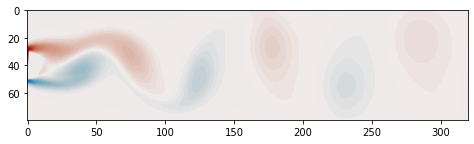

In [ ]:
import pandas as pd
import numpy as np
import cmocean

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
from torch.autograd import Variable
import matplotlib.pyplot as pt

ny,nx = 320,80
x2 = np.arange(0, ny, 1)
y2 = np.arange(0, nx, 1)
mX, mY = np.meshgrid(x2, y2)

for i in range(1):
  t_truee = k[1900+i,:].reshape((320, 80)) #SEE HERE
  minmax = np.max(np.abs(t_truee)) * 0.65
  pt.figure(facecolor="white",  edgecolor='k', figsize=(7.9,4.7))
  im = pt.imshow(t_truee.T, cmap=cmocean.cm.balance, interpolation='none', vmin=-minmax, vmax=minmax)
  pt.contourf(mX, mY, t_truee.T, 80, cmap=cmocean.cm.balance, alpha=1, vmin=-minmax-5, vmax=minmax+5)
  pt.show()
